# California House Pricing

In [1]:
# importing required libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

pd.options.mode.chained_assignment = None  # default='warn' -- disabling chain assignment warning
# (https://stackoverflow.com/questions/20625582/how-to-deal-with-settingwithcopywarning-in-pandas)

In [2]:
# importing dataset

df = pd.read_csv('housing.csv')

In [3]:
# A view at the dataset

df

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0        -122.23     37.88                41.0        880.0           129.0   
1        -122.22     37.86                21.0       7099.0          1106.0   
2        -122.24     37.85                52.0       1467.0           190.0   
3        -122.25     37.85                52.0       1274.0           235.0   
4        -122.25     37.85                52.0       1627.0           280.0   
...          ...       ...                 ...          ...             ...   
20635    -121.09     39.48                25.0       1665.0           374.0   
20636    -121.21     39.49                18.0        697.0           150.0   
20637    -121.22     39.43                17.0       2254.0           485.0   
20638    -121.32     39.43                18.0       1860.0           409.0   
20639    -121.24     39.37                16.0       2785.0           616.0   

       population  households  median_income  median_house_value  \
0           322.0       126.0         8.3252            452600.0   
1          2401.0      1138.0         8.3014            358500.0   
2           496.0       177.0         7.2574            352100.0   
3           558.0       219.0         5.6431            341300.0   
4           565.0       259.0         3.8462            342200.0   
...           ...         ...            ...                 ...   
20635       845.0       330.0         1.5603             78100.0   
20636       356.0       114.0         2.5568             77100.0   
20637      1007.0       433.0         1.7000             92300.0   
20638       741.0       349.0         1.8672             84700.0   
20639      1387.0       530.0         2.3886             89400.0   

      ocean_proximity  
0            NEAR BAY  
1            NEAR BAY  
2            NEAR BAY  
3            NEAR BAY  
4            NEAR BAY  
...               ...  
20635          INLAND  
20636          INLAND  
20637          INLAND  
20638          INLAND  
20639          INLAND  

[20640 rows x 10 columns]

### We can see that the dataset contains 20640 houses along with their basic info and median house value in different geographic region

In [4]:
df.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

### We can see the data has 207 null values for Total Bedrooms
207 out of 20640 is 1% so we can proceed to drop these rows

<AxesSubplot:>

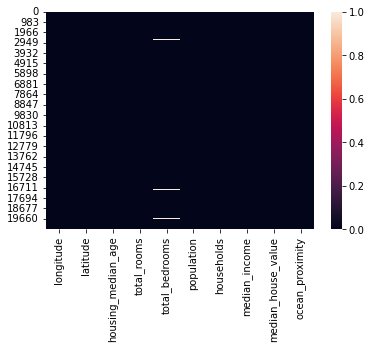

In [5]:
# Lets visualize the null values with heatmap

sns.heatmap(df.isnull())

In [6]:
# dropping null rows

df = df.dropna()

In [7]:
df.isnull().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64

<AxesSubplot:>

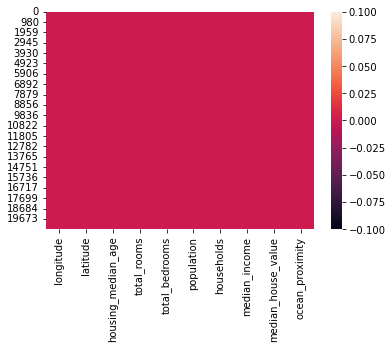

In [8]:
sns.heatmap(df.isnull())

### Now we can see there are no null values so we can proceed in our Analysis

In [9]:
# Types of column we have for the data

df.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity'],
      dtype='object')

### The different features of our dataset are:
1. Longitude of House
2. Latitude of House
3. Median Age of House
4. Total rooms in House
5. Total Bedrooms in House
6. Population Count
7. Households Count
8. Median Income
9. Median House Value
10. Ocean proximity

In [10]:
# number of rows and columns

df.shape

(20433, 10)

In [11]:
# first 5 rows

df.head()

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.23     37.88                41.0        880.0           129.0   
1    -122.22     37.86                21.0       7099.0          1106.0   
2    -122.24     37.85                52.0       1467.0           190.0   
3    -122.25     37.85                52.0       1274.0           235.0   
4    -122.25     37.85                52.0       1627.0           280.0   

   population  households  median_income  median_house_value ocean_proximity  
0       322.0       126.0         8.3252            452600.0        NEAR BAY  
1      2401.0      1138.0         8.3014            358500.0        NEAR BAY  
2       496.0       177.0         7.2574            352100.0        NEAR BAY  
3       558.0       219.0         5.6431            341300.0        NEAR BAY  
4       565.0       259.0         3.8462            342200.0        NEAR BAY

In [12]:
# columns, number of non-null vales per column and Data type

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20433 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20433 non-null  float64
 1   latitude            20433 non-null  float64
 2   housing_median_age  20433 non-null  float64
 3   total_rooms         20433 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20433 non-null  float64
 6   households          20433 non-null  float64
 7   median_income       20433 non-null  float64
 8   median_house_value  20433 non-null  float64
 9   ocean_proximity     20433 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.7+ MB


In [13]:
# Number of non-empty values, mean, standard deviation, min, max, 25/50/75 percentile

df.describe()

longitude      latitude  housing_median_age   total_rooms  \
count  20433.000000  20433.000000        20433.000000  20433.000000   
mean    -119.570689     35.633221           28.633094   2636.504233   
std        2.003578      2.136348           12.591805   2185.269567   
min     -124.350000     32.540000            1.000000      2.000000   
25%     -121.800000     33.930000           18.000000   1450.000000   
50%     -118.490000     34.260000           29.000000   2127.000000   
75%     -118.010000     37.720000           37.000000   3143.000000   
max     -114.310000     41.950000           52.000000  39320.000000   

       total_bedrooms    population    households  median_income  \
count    20433.000000  20433.000000  20433.000000   20433.000000   
mean       537.870553   1424.946949    499.433465       3.871162   
std        421.385070   1133.208490    382.299226       1.899291   
min          1.000000      3.000000      1.000000       0.499900   
25%        296.000000    787.000000    280.000000       2.563700   
50%        435.000000   1166.000000    409.000000       3.536500   
75%        647.000000   1722.000000    604.000000       4.744000   
max       6445.000000  35682.000000   6082.000000      15.000100   

       median_house_value  
count        20433.000000  
mean        206864.413155  
std         115435.667099  
min          14999.000000  
25%         119500.000000  
50%         179700.000000  
75%         264700.000000  
max         500001.000000

## Data Visualization

Text(0, 0.5, 'Longitude')

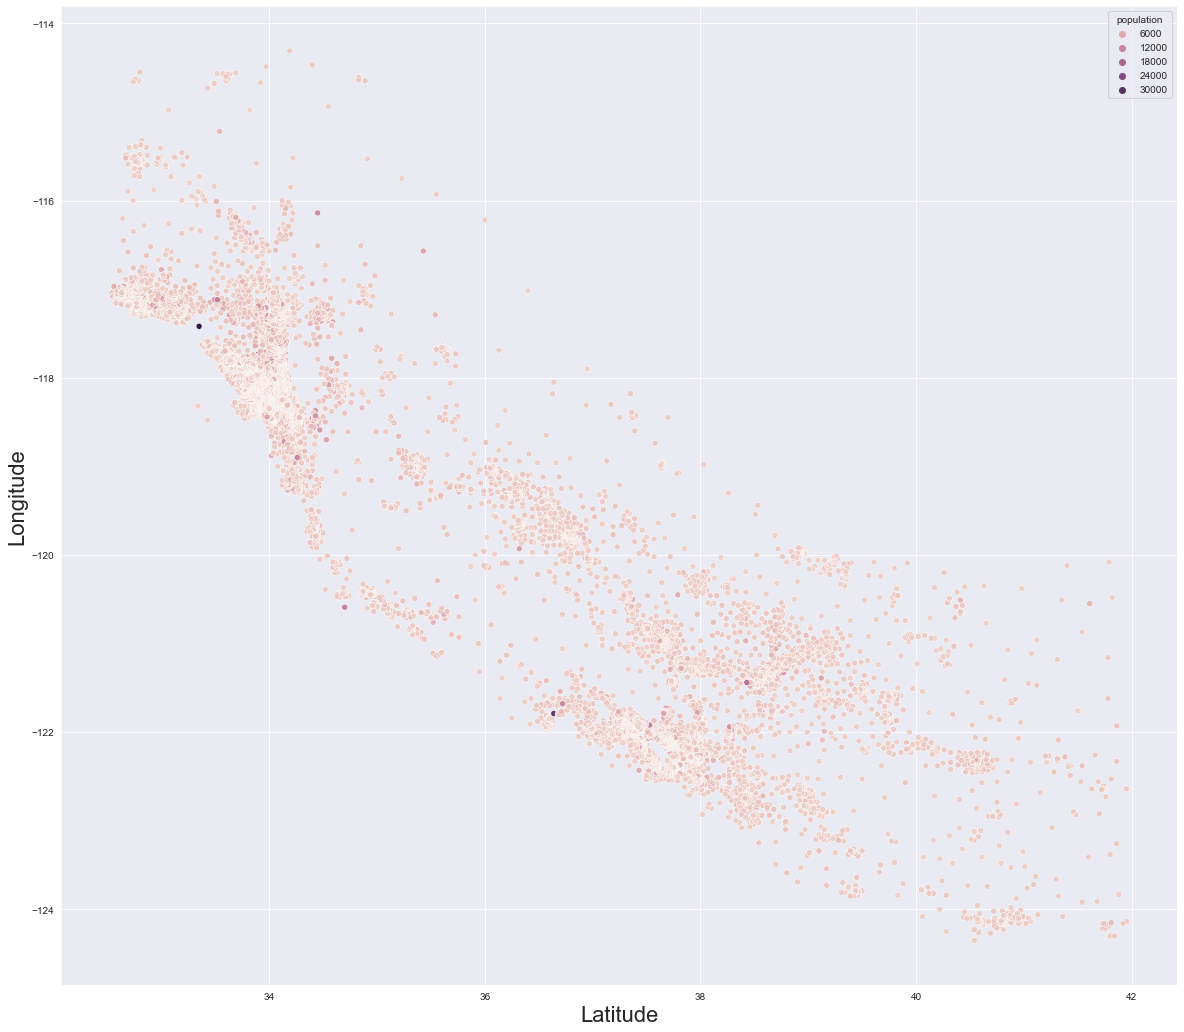

In [14]:
# Population based on Latitude and Longitude

plt.figure(figsize=(20, 18))
sns.set_style('darkgrid')
sns.scatterplot(x='latitude',y='longitude',hue='population',data=df)
plt.xlabel('Latitude',fontsize=22)
plt.ylabel('Longitude',fontsize=22)

The density of population on a given Latitude and Longitude

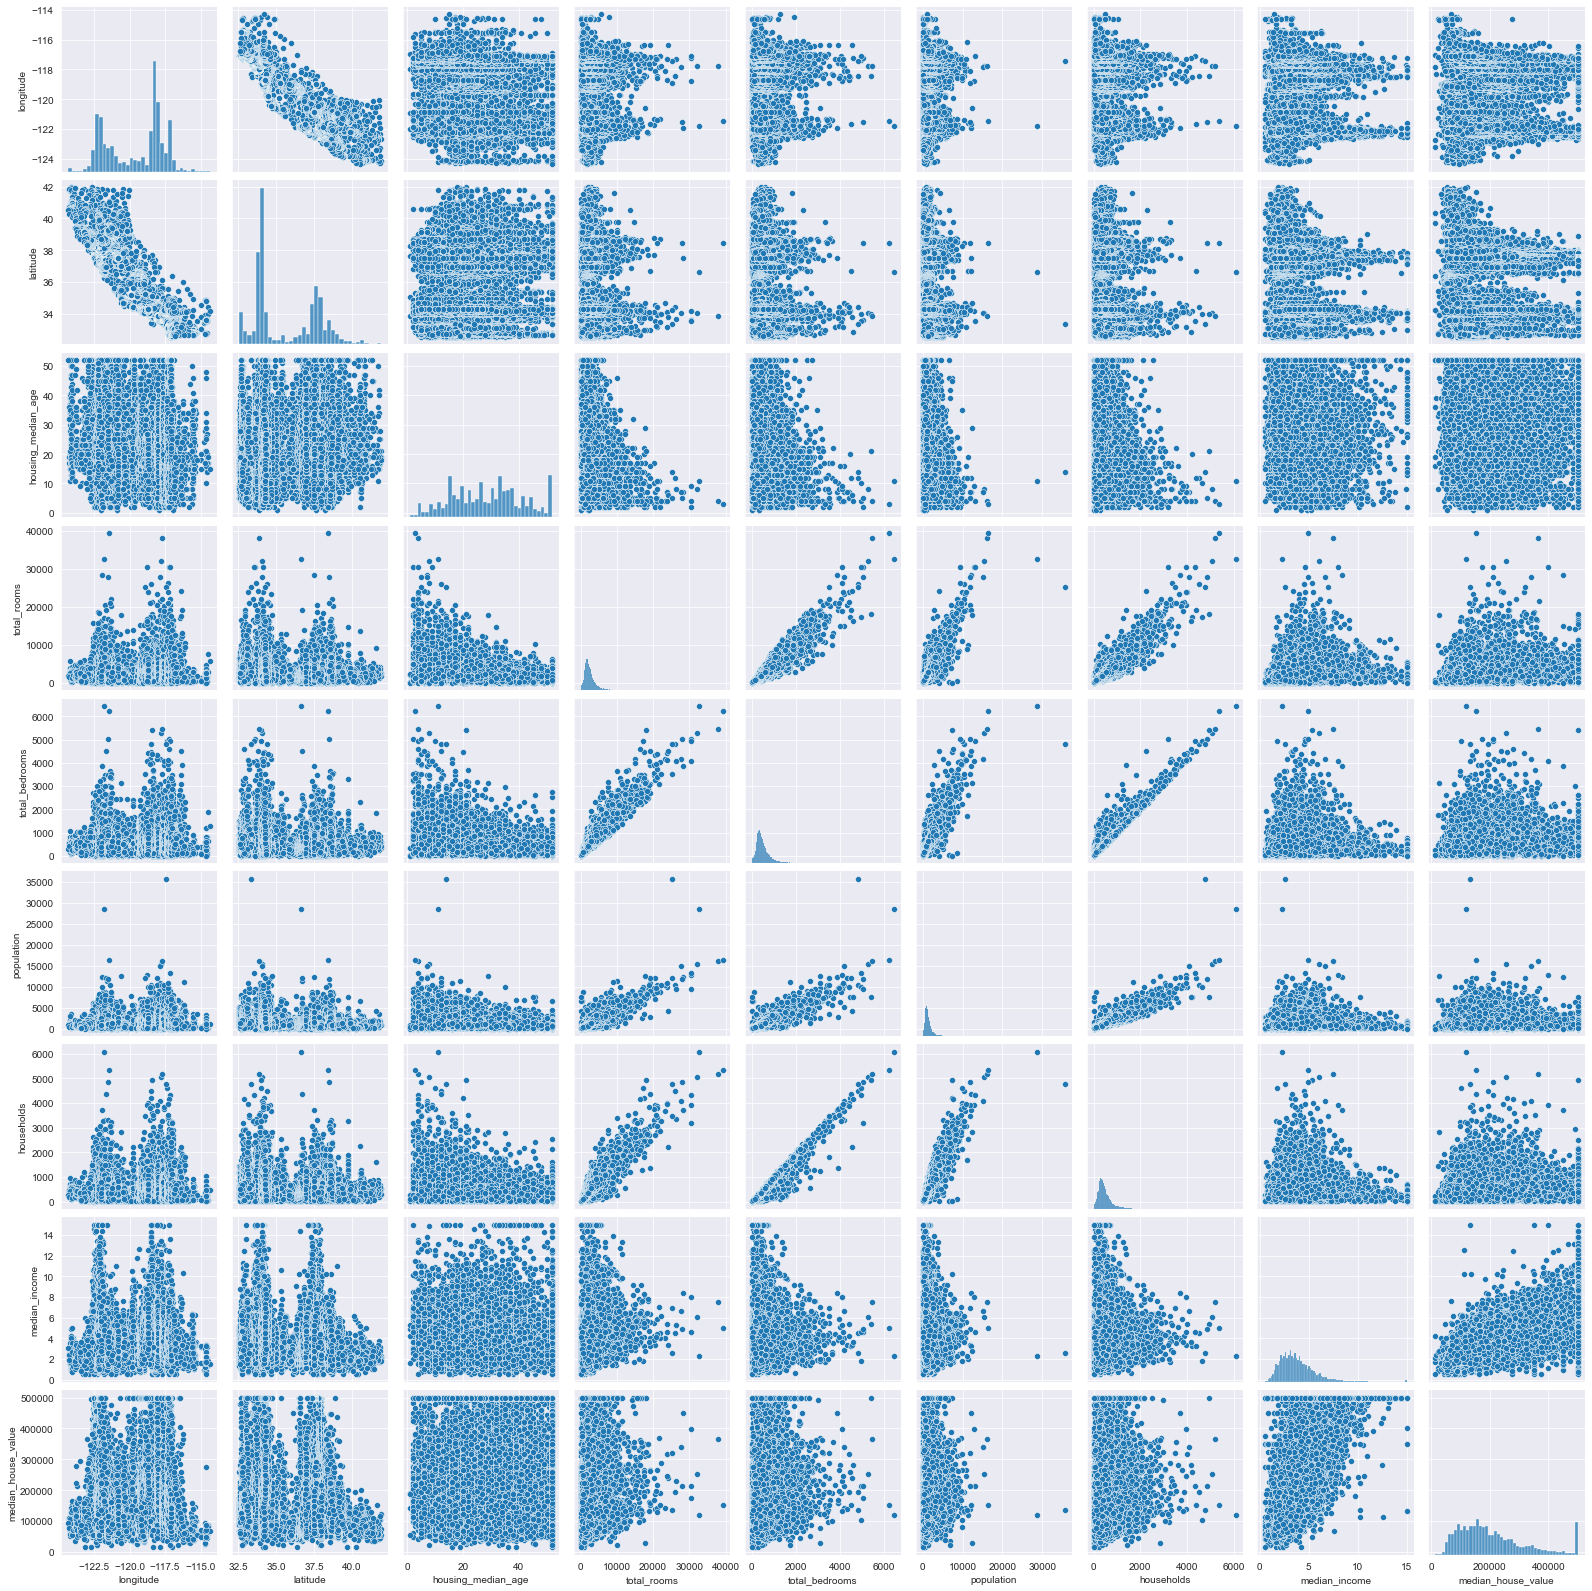

In [15]:
# Pairplot

sns.pairplot(df)

#### Histograms for Number of Houses by a given criteria

Text(0, 0.5, 'Number of houses')

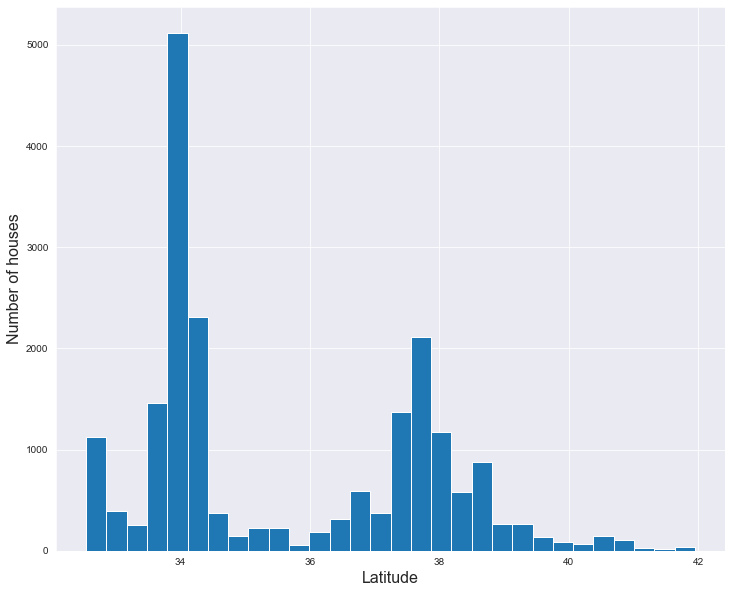

In [16]:
plt.figure(figsize=(12,10))
plt.hist(df['latitude'],bins=30);
plt.xlabel('Latitude',fontsize=16)
plt.ylabel('Number of houses',fontsize=16)

34 Latitude contains most number of houses and ~41 the least

Text(0, 0.5, 'Number of houses')

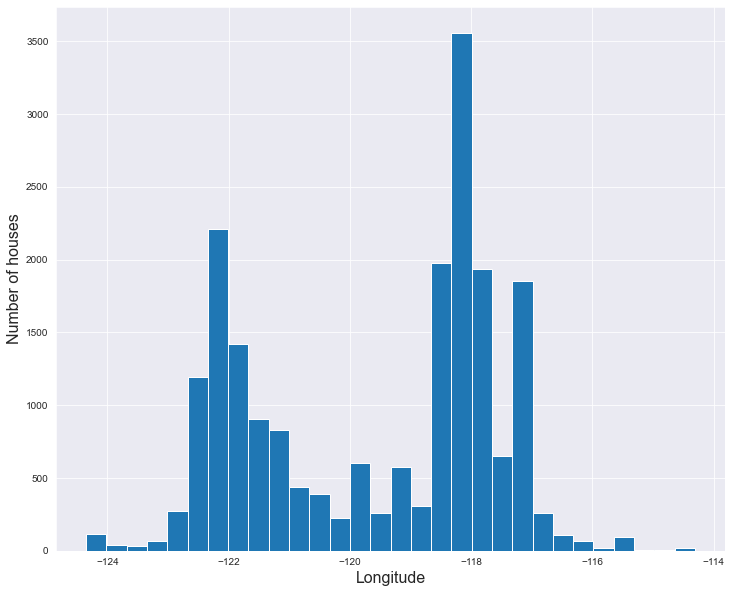

In [17]:
plt.figure(figsize=(12,10))
plt.hist(df['longitude'],bins=30);
plt.xlabel('Longitude',fontsize=16)
plt.ylabel('Number of houses',fontsize=16)

~-117 contains the most number of houses and ~-115 the least

Text(0, 0.5, 'Number of houses')

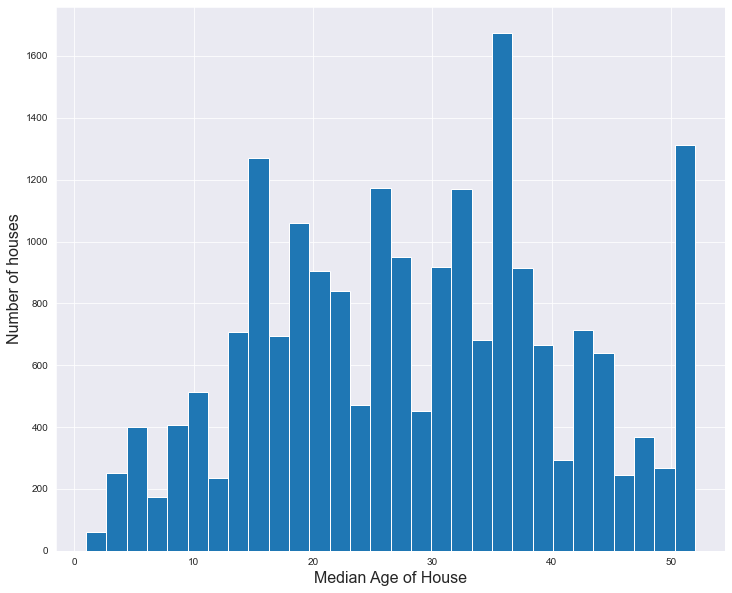

In [18]:
plt.figure(figsize=(12,10))
plt.hist(df['housing_median_age'],bins=30);
plt.xlabel('Median Age of House',fontsize=16)
plt.ylabel('Number of houses',fontsize=16)

Text(0, 0.5, 'Number of houses')

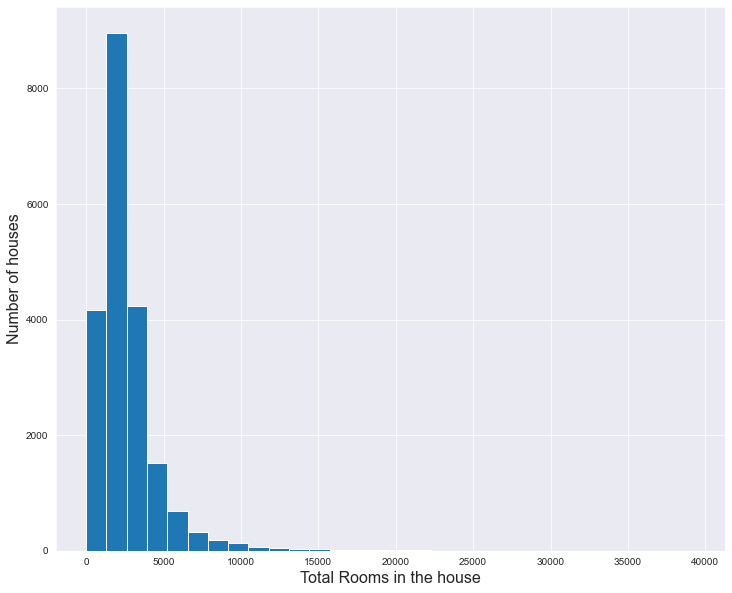

In [19]:
plt.figure(figsize=(12,10))
plt.hist(df['total_rooms'],bins=30);
plt.xlabel('Total Rooms in the house',fontsize=16)
plt.ylabel('Number of houses',fontsize=16)

Text(0, 0.5, 'Number of houses')

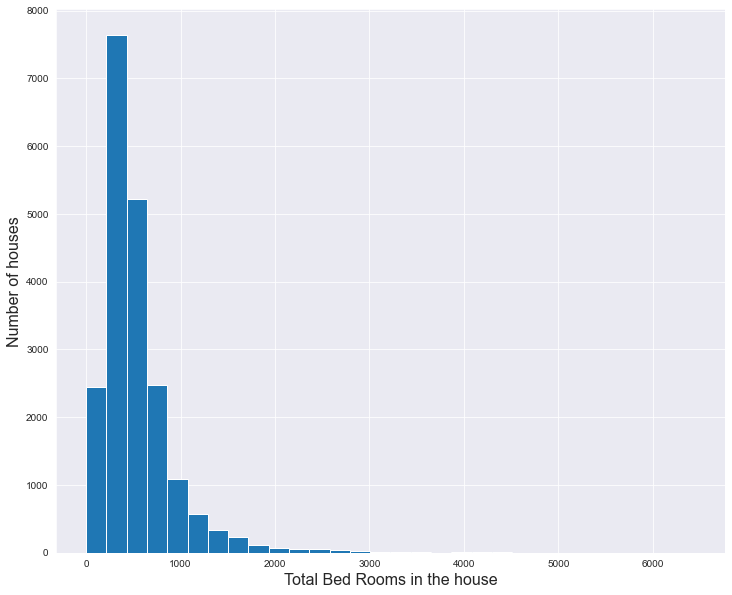

In [20]:
plt.figure(figsize=(12,10))
plt.hist(df['total_bedrooms'],bins=30);
plt.xlabel('Total Bed Rooms in the house',fontsize=16)
plt.ylabel('Number of houses',fontsize=16)

### Correlation Matrix

<AxesSubplot:>

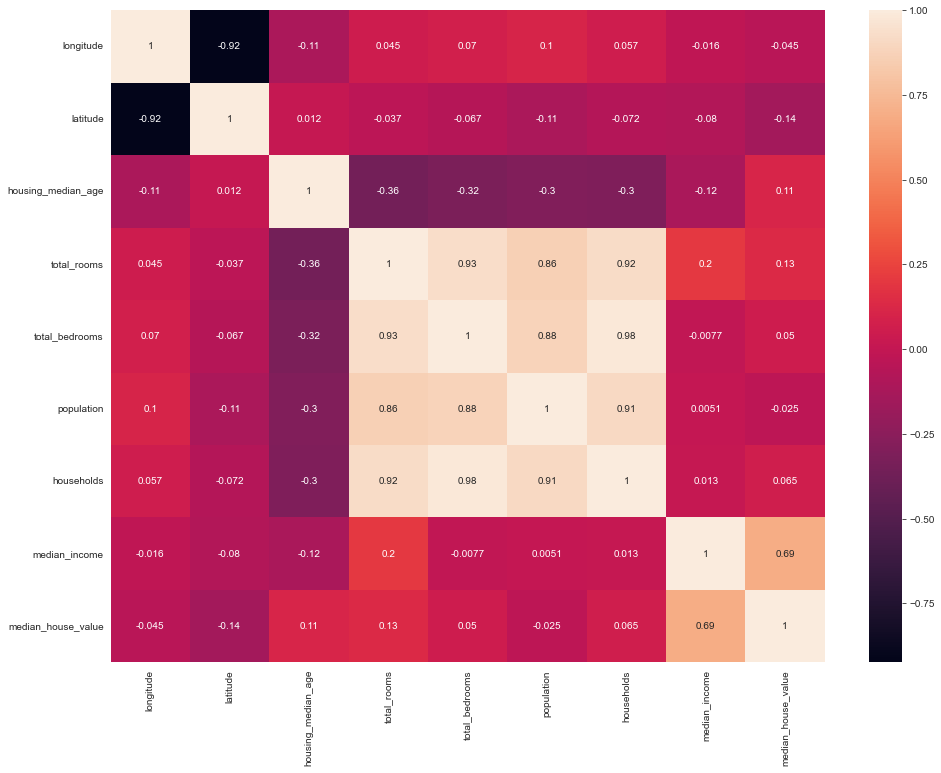

In [21]:
correlation = df.corr()

plt.figure(figsize=(16,12))
sns.heatmap(correlation, annot=True)

### Scatter Plots

<AxesSubplot:xlabel='latitude', ylabel='median_house_value'>

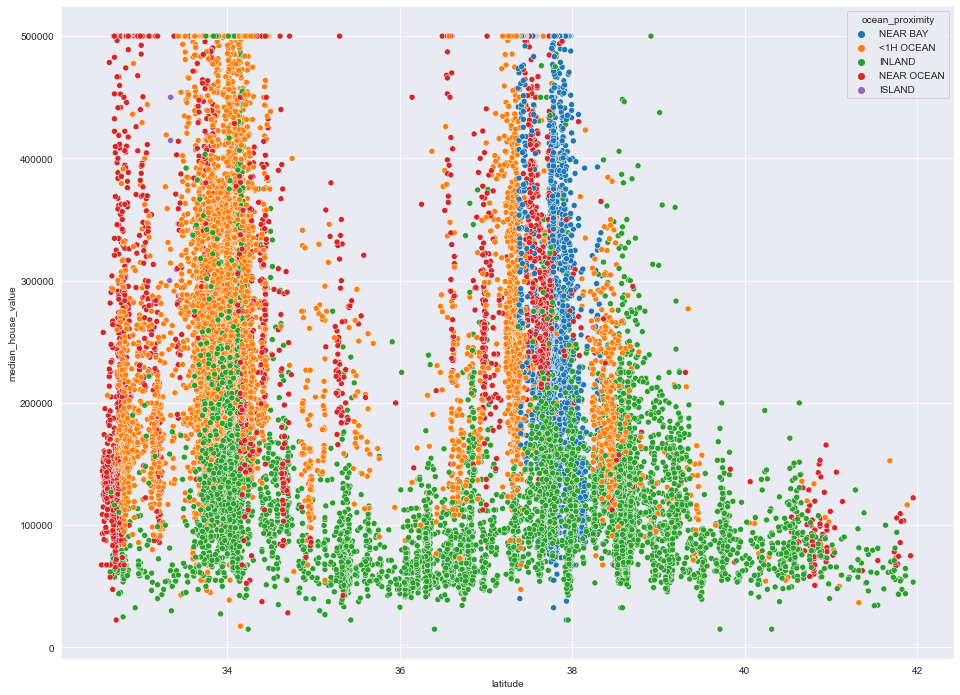

In [22]:
# Latitude

plt.figure(figsize=(16,12))
sns.scatterplot(x='latitude',y='median_house_value',hue='ocean_proximity',data=df)

<AxesSubplot:xlabel='longitude', ylabel='median_house_value'>

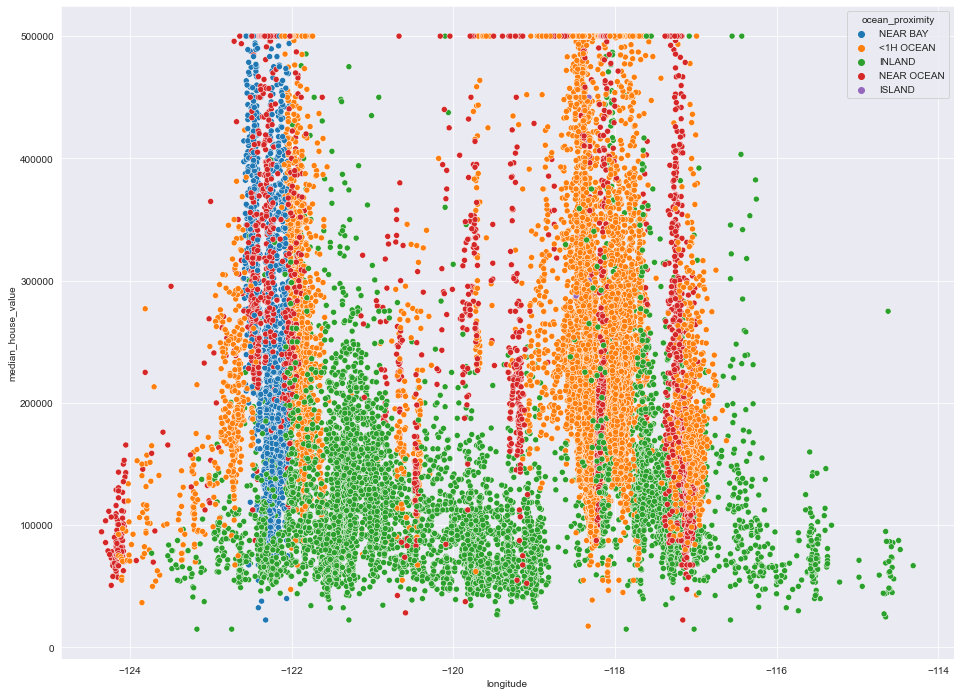

In [23]:
# Longitude

plt.figure(figsize=(16,12))
sns.scatterplot(x='longitude',y='median_house_value',hue='ocean_proximity',data=df)

<AxesSubplot:xlabel='housing_median_age', ylabel='median_house_value'>

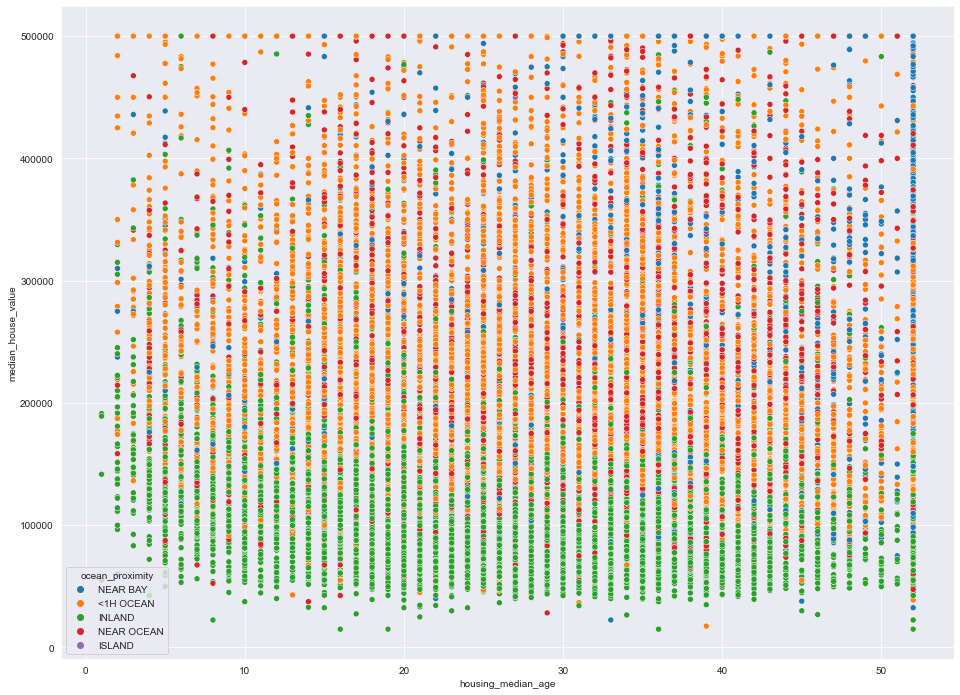

In [24]:
# Housing Median Age

plt.figure(figsize=(16,12))
sns.scatterplot(x='housing_median_age',y='median_house_value',hue='ocean_proximity',data=df)

<AxesSubplot:xlabel='total_rooms', ylabel='median_house_value'>

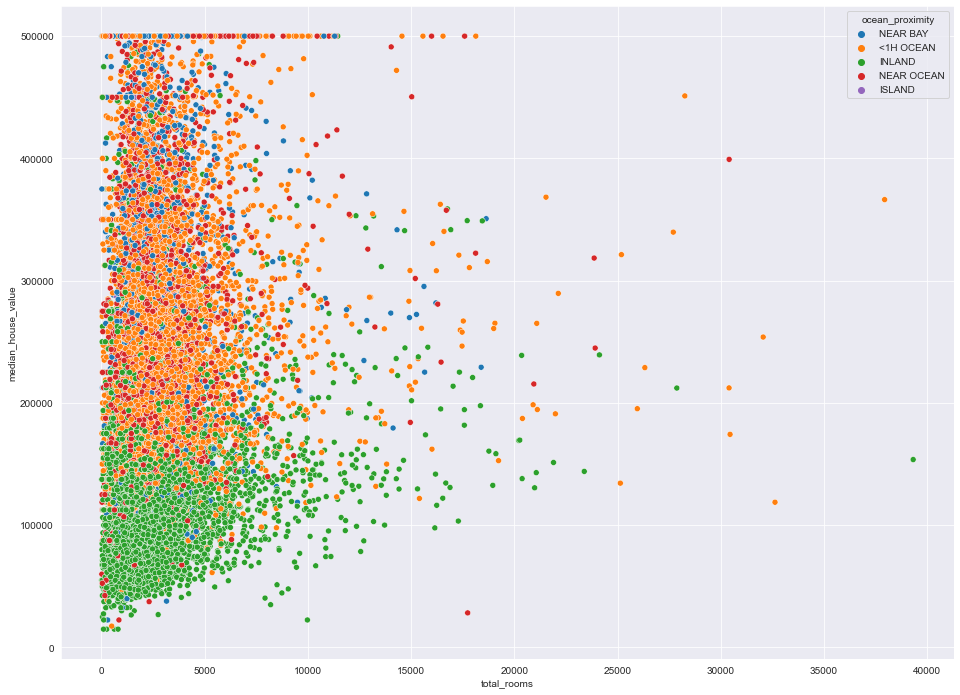

In [25]:
# Total Rooms

plt.figure(figsize=(16,12))
sns.scatterplot(x='total_rooms',y='median_house_value',hue='ocean_proximity',data=df)

<AxesSubplot:xlabel='total_bedrooms', ylabel='median_house_value'>

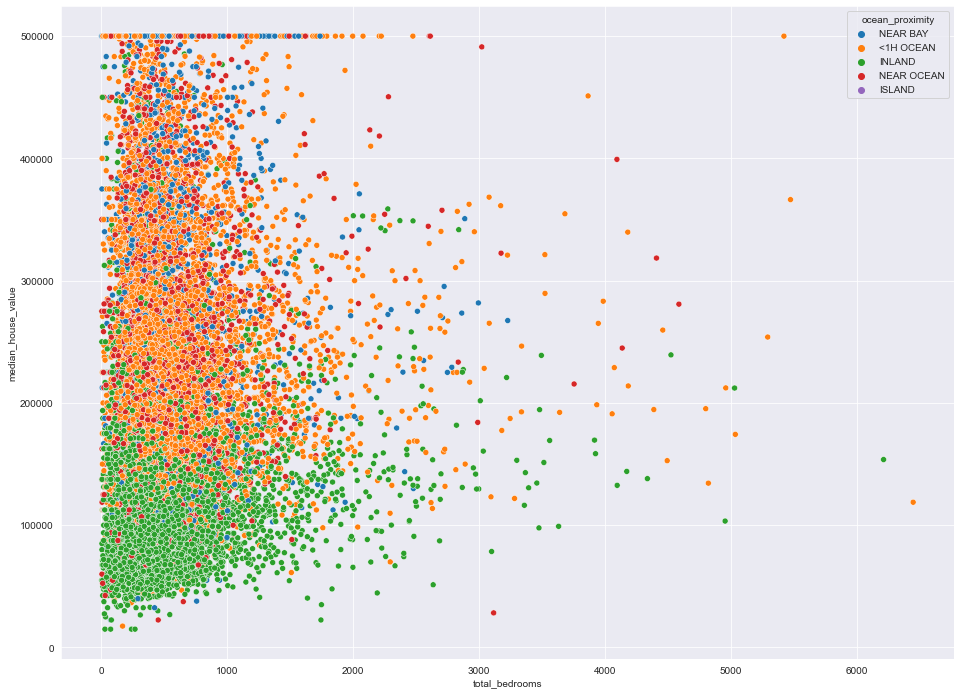

In [26]:
# Total BedRooms

plt.figure(figsize=(16,12))
sns.scatterplot(x='total_bedrooms',y='median_house_value',hue='ocean_proximity',data=df)

<AxesSubplot:xlabel='population', ylabel='median_house_value'>

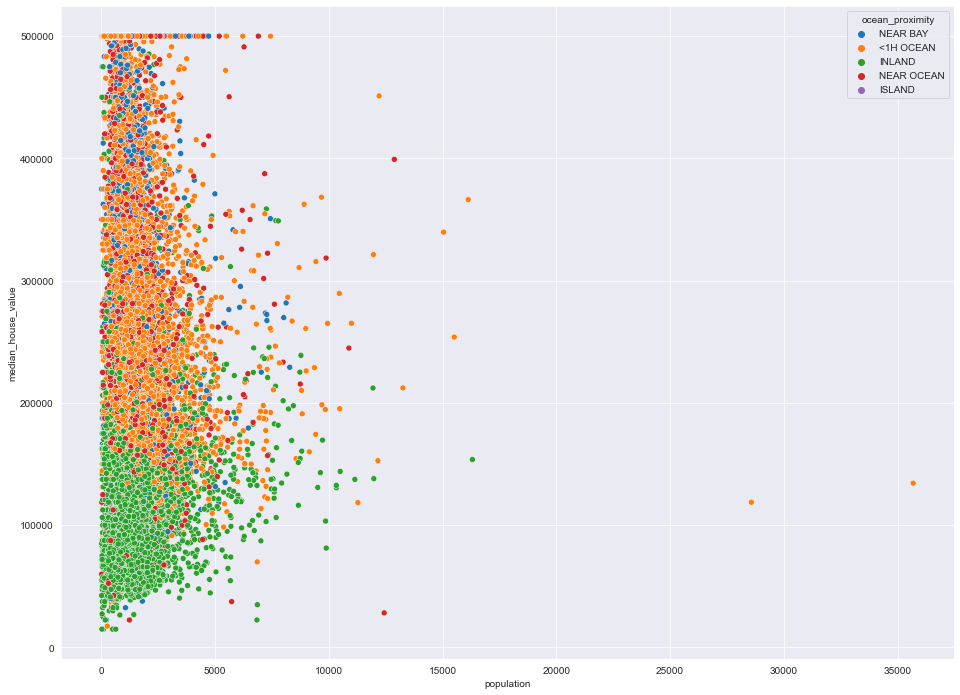

In [27]:
# Population

plt.figure(figsize=(16,12))
sns.scatterplot(x='population',y='median_house_value',hue='ocean_proximity',data=df)

<AxesSubplot:xlabel='households', ylabel='median_house_value'>

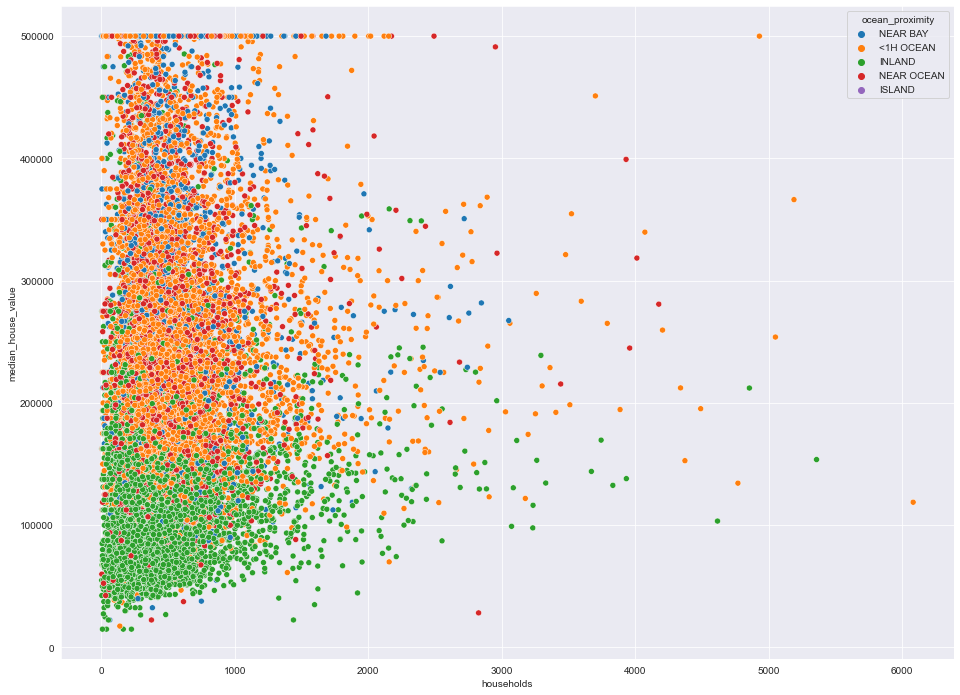

In [28]:
# Households

plt.figure(figsize=(16,12))
sns.scatterplot(x='households',y='median_house_value',hue='ocean_proximity',data=df)

<AxesSubplot:xlabel='median_income', ylabel='median_house_value'>

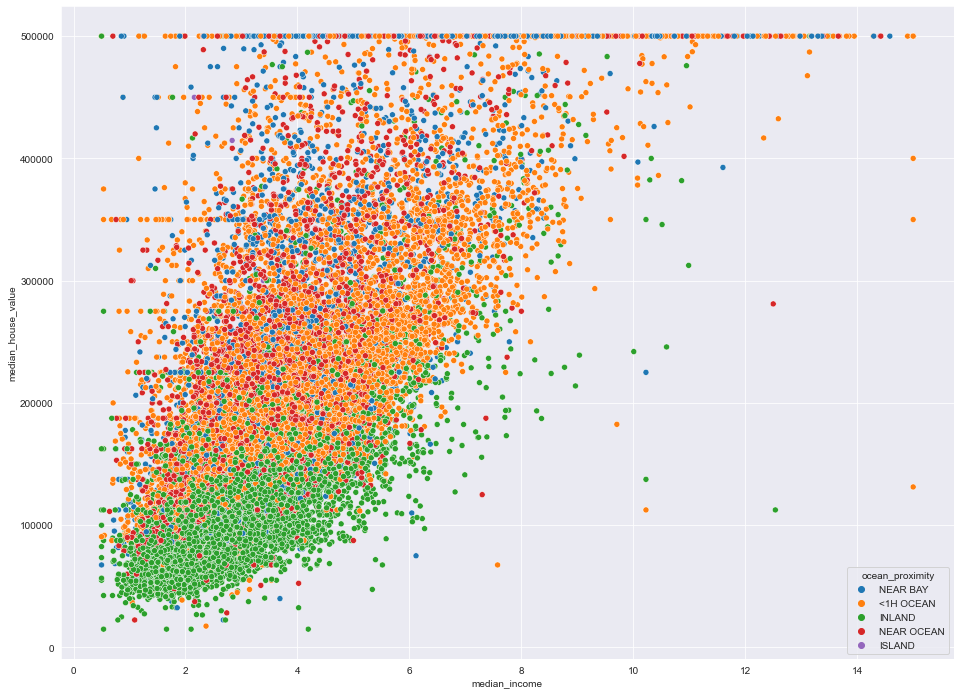

In [29]:
# Housing Median Age

plt.figure(figsize=(16,12))
sns.scatterplot(x='median_income',y='median_house_value',hue='ocean_proximity',data=df)

### Scatter Matrix

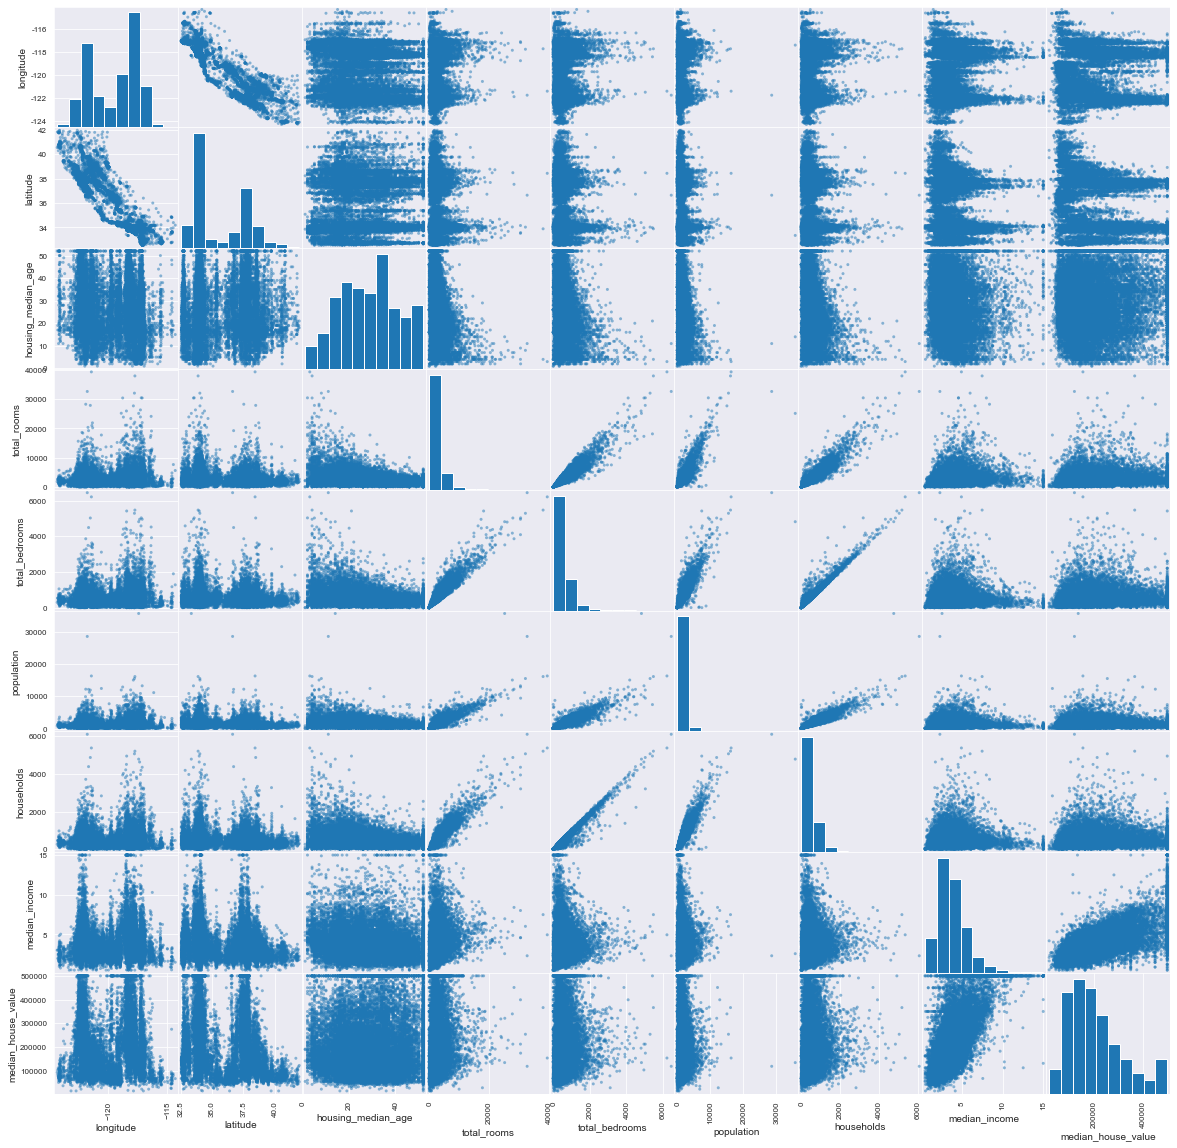

In [30]:
pd.plotting.scatter_matrix(df,figsize=(20,20));

## Feature Engineering

#### Adding some features to our dataset

- rooms_per_household = total_rooms / households
- bedrooms_per_room = total_bedrooms / total_rooms
- population_per_household = population / households

In [31]:
df['rooms_per_household'] = df['total_rooms'] / df['households']
df['bedrooms_per_room'] = df['total_bedrooms'] / df['total_rooms']
df['population_per_household'] = df['population'] / df['households']

### Visualizing New Features

Text(0, 0.5, 'Number of houses')

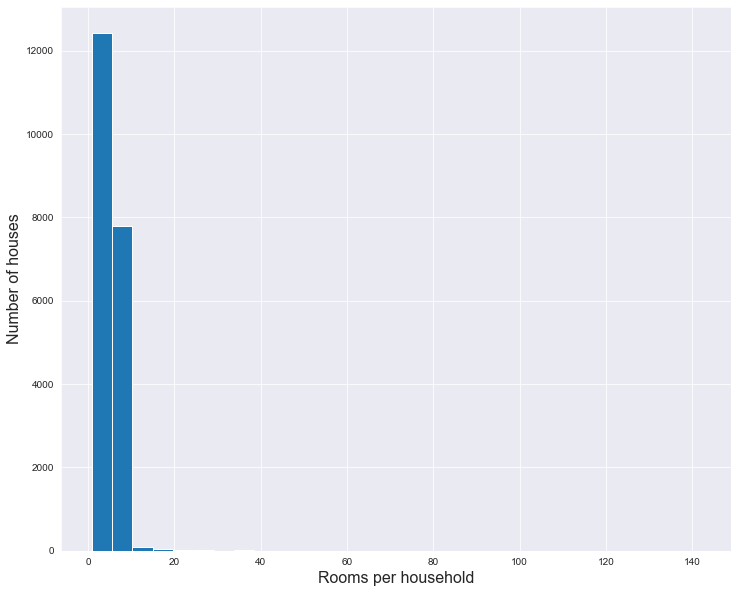

In [32]:
plt.figure(figsize=(12,10))
plt.hist(df['rooms_per_household'],bins=30);
plt.xlabel('Rooms per household',fontsize=16)
plt.ylabel('Number of houses',fontsize=16)

Text(0, 0.5, 'Number of houses')

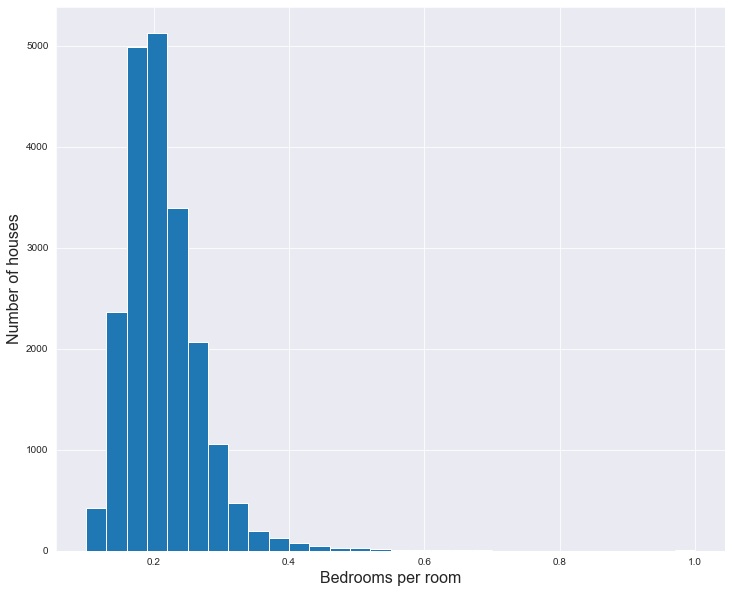

In [33]:
plt.figure(figsize=(12,10))
plt.hist(df['bedrooms_per_room'],bins=30);
plt.xlabel('Bedrooms per room',fontsize=16)
plt.ylabel('Number of houses',fontsize=16)

<AxesSubplot:xlabel='rooms_per_household', ylabel='median_house_value'>

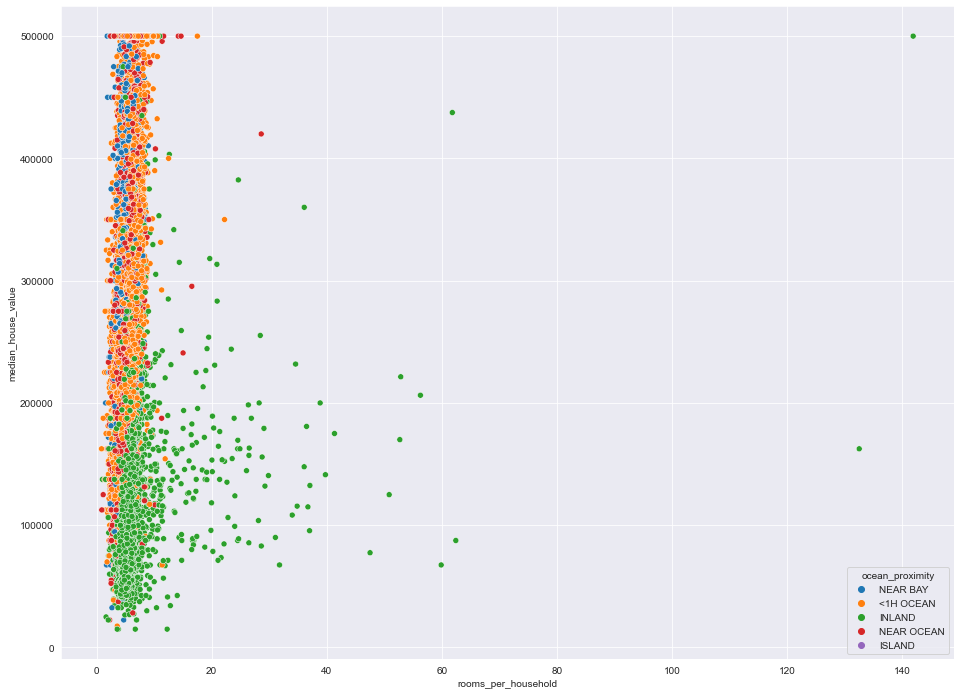

In [34]:
# Rooms per household

plt.figure(figsize=(16,12))
sns.scatterplot(x='rooms_per_household',y='median_house_value',hue='ocean_proximity',data=df)

<AxesSubplot:xlabel='bedrooms_per_room', ylabel='median_house_value'>

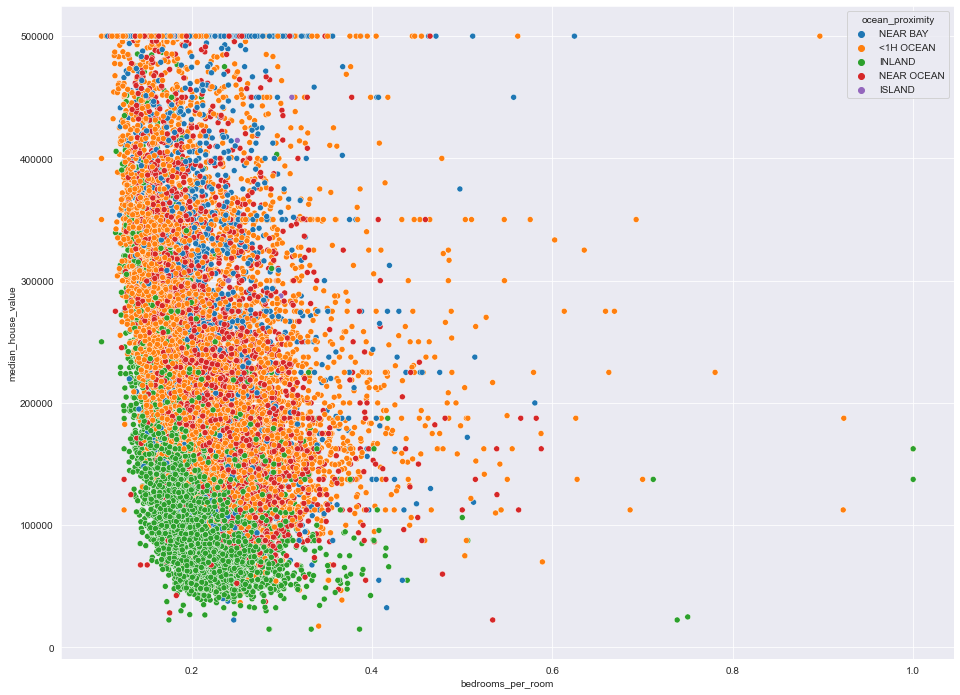

In [35]:
# Bedrooms per room

plt.figure(figsize=(16,12))
sns.scatterplot(x='bedrooms_per_room',y='median_house_value',hue='ocean_proximity',data=df)

<AxesSubplot:xlabel='population_per_household', ylabel='median_house_value'>

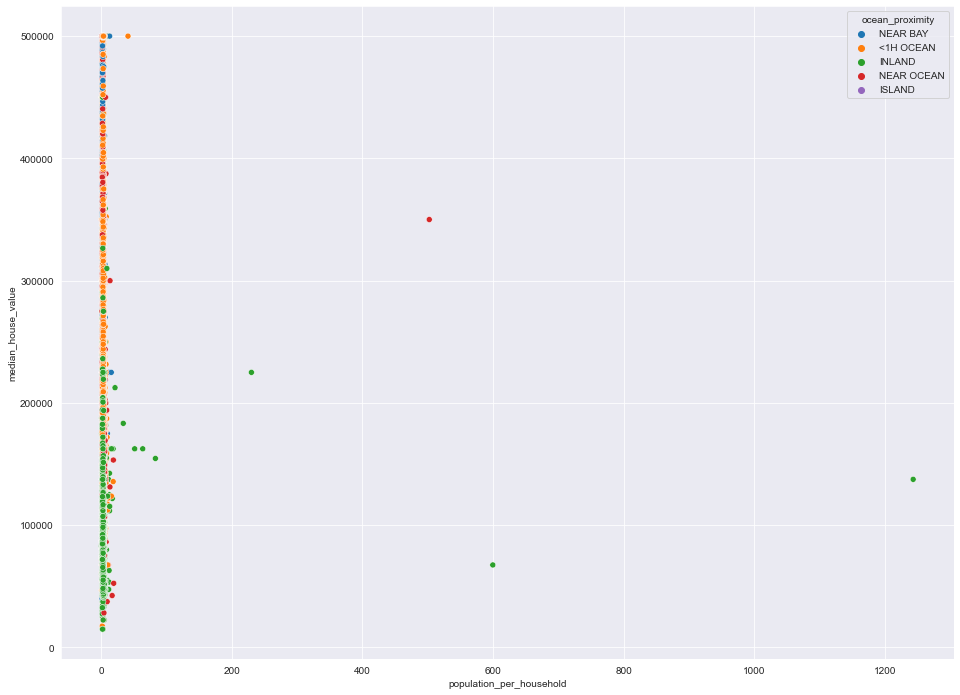

In [36]:
# Population per household

plt.figure(figsize=(16,12))
sns.scatterplot(x='population_per_household',y='median_house_value',hue='ocean_proximity',data=df)

### Encoding Ocean Proximity

In [37]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

In [38]:
df['ocean_proximity_cat'] = le.fit_transform(df['ocean_proximity'])

df['ocean_proximity_cat']

0        3
1        3
2        3
3        3
4        3
        ..
20635    1
20636    1
20637    1
20638    1
20639    1
Name: ocean_proximity_cat, Length: 20433, dtype: int32

In [39]:
df = df.drop('ocean_proximity',axis=1)

### Preprocessing Data

In [40]:
x = df.drop('median_house_value',axis=1).values
y = df.iloc[:,8].values

In [41]:
print(x)

[[-122.23         37.88         41.         ...    0.14659091
     2.55555556    3.        ]
 [-122.22         37.86         21.         ...    0.15579659
     2.10984183    3.        ]
 [-122.24         37.85         52.         ...    0.12951602
     2.80225989    3.        ]
 ...
 [-121.22         39.43         17.         ...    0.21517303
     2.3256351     1.        ]
 [-121.32         39.43         18.         ...    0.21989247
     2.12320917    1.        ]
 [-121.24         39.37         16.         ...    0.22118492
     2.61698113    1.        ]]


In [42]:
print(y)

[452600. 358500. 352100. ...  92300.  84700.  89400.]


### Splitting the dataset into Training and Test Set

In [43]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.3,random_state=1)

In [44]:
print(x_train)

[[-1.18290000e+02  3.39500000e+01  3.90000000e+01 ...  2.51616696e-01
   3.57177616e+00  0.00000000e+00]
 [-1.21380000e+02  3.87000000e+01  2.50000000e+01 ...  1.94947691e-01
   2.81353768e+00  1.00000000e+00]
 [-1.19290000e+02  3.42300000e+01  2.20000000e+01 ...  2.44569590e-01
   1.35564054e+00  4.00000000e+00]
 ...
 [-1.18450000e+02  3.40800000e+01  5.20000000e+01 ...  1.17333333e-01
   2.64827586e+00  0.00000000e+00]
 [-1.16970000e+02  3.39400000e+01  2.90000000e+01 ...  1.97685330e-01
   2.85572139e+00  1.00000000e+00]
 [-1.22200000e+02  3.77900000e+01  3.50000000e+01 ...  2.54716981e-01
   2.58717949e+00  3.00000000e+00]]


In [45]:
print(x_test)

[[-118.18         34.14         38.         ...    0.16025008
     2.43225806    0.        ]
 [-118.19         34.14         38.         ...    0.16429354
     2.67003367    0.        ]
 [-117.25         33.2          10.         ...    0.23073171
     2.76433121    0.        ]
 ...
 [-119.68         37.35         13.         ...    0.16731686
     2.66570605    1.        ]
 [-117.83         34.11         29.         ...    0.16360914
     3.33483146    1.        ]
 [-117.14         32.81         34.         ...    0.16819222
     2.72108844    4.        ]]


In [46]:
print(y_train)

[ 93200.  89500. 275000. ... 500001.  91200. 126000.]


In [47]:
print(y_test)

[360900. 291500. 131300. ... 119800. 203000. 179100.]


### Feature Scaling

In [48]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [49]:
print(x_train)

[[ 0.63948045 -0.78746452  0.8277419  ...  0.6593816   0.0366462
  -0.82263184]
 [-0.90334508  1.43540467 -0.2844042  ... -0.31424647 -0.02491568
  -0.1184964 ]
 [ 0.14018416 -0.65643223 -0.52272122 ...  0.53830552 -0.14328331
   1.99390993]
 ...
 [ 0.55959305 -0.7266281   1.86044899 ... -1.64773586 -0.0383334
  -0.82263184]
 [ 1.29855155 -0.79214424  0.03335183 ... -0.2672112  -0.02149076
  -0.1184964 ]
 [-1.31276804  1.00954973  0.50998587 ...  0.71264748 -0.04329385
   1.28977449]]


In [50]:
print(x_test)

[[ 0.69440304 -0.69854975  0.74830289 ... -0.91038479 -0.05587202
  -0.82263184]
 [ 0.68941008 -0.69854975  0.74830289 ... -0.84091433 -0.03656687
  -0.82263184]
 [ 1.15874859 -1.13844386 -1.4759893  ...  0.30055738 -0.02891079
  -0.82263184]
 ...
 [-0.05454139  0.80364185 -1.23767228 ... -0.78897072 -0.03691823
  -0.1184964 ]
 [ 0.86915675 -0.71258893  0.03335183 ... -0.85267303  0.0174085
  -0.1184964 ]
 [ 1.21367119 -1.32095312  0.43054687 ... -0.77393123 -0.0324217
   1.99390993]]


### Simple Linear Regression

In [51]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(x_train, y_train)

LinearRegression()

### Predicting the Test set results

In [52]:
y_pred = regressor.predict(x_test)

In [53]:
regressor.score(x_train, y_train)

0.6417045533320919

In [54]:
regressor.score(x_test, y_test)

0.6570854295356426

### Our model has an accuracy of 64.17% on training data and 65.70% on training data